In [14]:
import pandas as pd
from datetime import datetime
import itertools
import numpy as np
from io import StringIO
import math
import scipy.stats.stats as stats
import matplotlib.pyplot as plt 
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import LeaveOneGroupOut
from sklearn import metrics, svm, neighbors, linear_model, tree
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [15]:
df = pd.read_csv("Analysis-NoTimeShift-Activity-Sorted.csv")


In [16]:
df.head()


,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [17]:
df=df.rename(columns = {'0':'subject', '1':'activity', '2':'raw acc data'})


In [18]:
df.head()

,Unnamed: 0,subject,activity,raw acc data,x,y,z,magnitude,running x,running y,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,0,114,201,"[[0.07400000000000001, -0.89500000000000002, 0...","[0.07400000000000001, 0.070000000000000007, 0....","[-0.89500000000000002, -0.88300000000000001, -...","[0.43799999999999994, 0.41799999999999998, 0.4...","[0.9991721573382637, 0.9794452511498537, 0.984...",[ 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0....,[-0.45 -0.49 -0.54 -0.58 -0.63 -0.67 -0.72 -0....,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1,114,201,"[[-0.039, -1.1599999999999999, 0.5939999999999...","[-0.039, 0.0080000000000000002, -0.20300000000...","[-1.1599999999999999, -0.97999999999999998, -0...","[0.59399999999999997, 0.83999999999999997, 0.7...","[1.3038239911889948, 1.2907610158352318, 1.161...",[-0.02 -0.02 0.01 0.01 0.01 0.01 0.02 0....,[-0.37 -0.42 -0.49 -0.55 -0.58 -0.62 -0.66 -0....,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,2,114,301,"[[0.223, -0.66400000000000003, 0.9020000000000...","[0.223, 0.24199999999999999, 0.233999999999999...","[-0.66400000000000003, -0.71499999999999997, -...","[0.90200000000000002, 0.80099999999999993, 0.7...","[1.1420284584895422, 1.1006316368340499, 1.116...",[ 0.1 0.11 0.12 0.13 0.14 0.16 0.17 0....,[-0.43 -0.47 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,3,114,101,"[[0.24600000000000002, -0.78900000000000003, 0...","[0.24600000000000002, 0.125, 0.354999999999999...","[-0.78900000000000003, -0.77000000000000002, -...","[0.54299999999999993, 0.621, 0.645000000000000...","[0.9888811859874774, 0.9970787330998491, 1.140...",[ 0.12 0.13 0.14 0.15 0.16 0.15 0.14 0....,[-0.42 -0.46 -0.5 -0.55 -0.59 -0.63 -0.67 -0....,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,4,114,101,"[[0.17600000000000002, -0.85499999999999998, 0...","[0.17600000000000002, 0.17600000000000002, 0.1...","[-0.85499999999999998, -0.86699999999999999, -...","[0.45299999999999996, 0.44500000000000001, 0.4...","[0.983468352312366, 0.9902979349670482, 0.9657...",[ 0.08 0.09 0.09 0.11 0.13 0.13 0.13 0....,[-0.43 -0.48 -0.52 -0.57 -0.62 -0.67 -0.71 -0....,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [19]:
df.subject.unique()

array([ 114.,  122.,  115.,  104.,  111.,  107.,  112.,  102.,  118.,
        110.,  103.,  105.,  109.,  117.,  108.,  113.,  120.,  101.,
        123.,  106.,  124.,  119.,  116.,  121.])

In [20]:
Y = df['activity']

In [21]:
features = ['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean','x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', 'z fft bin 7', 'z fft bin 8', 'z fft bin 9','x noise min', 'y noise min', 'z noise min', 'x noise max', 'y noise max', 
'z noise max', 'x noise std', 'y noise std', 'z noise std']
#features_ind = list(range(16,104))
X = df[features]
feature_names = X.columns.tolist()
print(len(feature_names))
print(feature_names)
groups = df.subject.unique()
X.head()

88
['max', 'min', 'std', 'skew', 'kurtosis', 'mean', 'median', 'x max', 'y max', 'z max', 'x min', 'y min', 'z min', 'x mean', 'y mean', 'z mean', 'x median', 'y median', 'z median', 'x skew', 'y skew', 'z skew', 'x kurtosis', 'y kurtosis', 'z kurtosis', 'x std', 'y std', 'z std', 'xy mean', 'yz mean', 'xz mean', 'x fft min', 'y fft min', 'z fft min', 'x fft max', 'y fft max', 'z fft max', 'x fft std', 'y fft std', 'z fft std', 'x fft mean', 'y fft mean', 'z fft mean', 'x fft median', 'y fft median', 'z fft median', 'x fft mean weighted', 'y fft mean weighted', 'z fft mean weighted', 'x fft bin 1', 'x fft bin 10', 'x fft bin 2', 'x fft bin 3', 'x fft bin 4', 'x fft bin 5', 'x fft bin 6', 'x fft bin 7', 'x fft bin 8', 'x fft bin 9', 'y fft bin 1', 'y fft bin 10', 'y fft bin 2', 'y fft bin 3', 'y fft bin 4', 'y fft bin 5', 'y fft bin 6', 'y fft bin 7', 'y fft bin 8', 'y fft bin 9', 'z fft bin 1', 'z fft bin 10', 'z fft bin 2', 'z fft bin 3', 'z fft bin 4', 'z fft bin 5', 'z fft bin 6', '

,max,min,std,skew,kurtosis,mean,median,x max,y max,z max,...,z fft bin 9,x noise min,y noise min,z noise min,x noise max,y noise max,z noise max,x noise std,y noise std,z noise std
0,1.096704,0.879901,0.035263,-0.256016,2.947613,0.996619,0.994714,0.320,-0.836,0.465,...,0.263667,-0.10830,-0.47810,-0.10490,0.14910,0.07475,0.24555,0.061450,0.140260,0.067425
1,1.777750,0.444051,0.296776,0.469835,-0.145111,1.027260,1.013155,0.688,-0.398,1.309,...,0.351000,-0.39195,-0.78700,-0.37135,0.69425,0.40145,0.80150,0.188313,0.282239,0.264855
2,1.181703,0.846446,0.062314,0.095966,0.463856,1.016351,1.005488,0.441,-0.664,0.902,...,0.425833,-0.21085,-0.37080,-0.19250,0.15555,0.14615,0.61410,0.074228,0.119320,0.147130
3,1.227883,0.775228,0.077944,0.459561,1.728157,1.000864,0.990655,0.355,-0.254,1.000,...,0.545500,-0.27475,-0.40325,-0.18435,0.24025,0.50990,0.38295,0.100871,0.148942,0.130371
4,1.251106,0.838346,0.088783,0.490714,-0.105809,1.007371,0.988382,0.355,-0.668,0.734,...,0.468167,-0.33510,-0.56955,-0.16830,0.25245,0.18820,0.36680,0.107441,0.150660,0.115344


In [22]:
# features analysis
def select_features(X, Y, plot=False):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
    
    feature_names = X.columns.tolist()

#     X = data[feature_names]
#     Y = data['activity']

    forest.fit(X, Y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
    indices = np.argsort(importances)[::-1]
    
    importances = np.array(importances)
    importances /= importances.max()

    if plot:
        for f in range(X.shape[1]):
            print("%d. feature '%s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


        # Plot the feature importances of the forest
        plt.figure()
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        
    # select features > 25 % importance
    features = [i for i,j in zip(feature_names,importances) if j > 0.25]

    print ("Selected number of features: %d" % len(features))

    if plot:
        for f in range(len(features)):
            print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))
        
    return features

In [23]:
class_names = [101, 103, 104, 201, 301, 302, 303, 304]
print(class_names)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

   
    print('Confusion matrix')

    

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[101, 103, 104, 201, 301, 302, 303, 304]


In [24]:
# grid search with cross-validation (subject-wise or k-folds) for picking hyperparameters
# returns list with best estimators
# params:
# X_train - training data
# y_train - labels
# kfoldcv - true to use 10-fold cross-validation
# display - boolean for printing out cross-validation info
def grid(X_train,y_train, display=False, kfoldcv=True):
    # Different models to try
    #       Model name ---------------------------------------------------------------------
    #      Parameters ------------------------------------------                           |
    #     Classifier -----------                               |                           |
    #                          |                               |                           |
    #                          v                               v                           |
    #models = [[tree.DecisionTreeClassifier(), {'min_samples_split': [2, 4, 6, 8, 10],#    |
                                               #'min_samples_leaf': [1, 5, 10, 15, 20],#     v
                                               #'max_depth': [10, 20, 30, 40, 50]},       "Decision Tree"]
              #]

    #models.append([linear_model.LogisticRegression(), {'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Ridge Penalty"])

#     models.append([linear_model.LogisticRegression(penalty='l1'), {'C': [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]}, "Logistic Regression with Lasso Penalty"])

    # LinearSVC
    models = [[svm.SVC(kernel='rbf'), { # class_weight="balanced"; tol 
                              'gamma': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6], 
                               'C': [1e+4, 1e+3, 1e+2, 1e+1, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]}, "SVM rbf"]]
    
    #models.append([neighbors.KNeighborsClassifier(), {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]}, "K-Nearest Neighbors"])


    #models = [[RandomForestClassifier(), {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400]
                                              # }, "Random Forest"]]

    models_with_best_params = []

    # cross-validation strategy
    # Leave One Group Out
    groups = y_train.unique()
    logo = LeaveOneGroupOut()
    cv = logo.get_n_splits(X_train,y_train,groups)
    
    # for 10-folds cross-validation
    if kfoldcv:
        cv = 10 

    for model in models:
        clf = GridSearchCV(model[0], model[1], cv = cv)
        clf.fit(X_train, y_train)
        best_params = clf.best_params_
        best_estimator = clf.best_estimator_

        model_with_best_params = [best_estimator, best_params, model[2]]

        models_with_best_params.append(model_with_best_params)

        if (display):
            print(model[2], ": ")
            print("Best score for ", model[2], ":", clf.best_score_)
            print()
            print("Best parameters for ", model[2], " found on development set:", best_params)
    #         print()
    #         print("Best estimator for ", model[2], " model:", best_estimator)
            print()
    #         print()

    #         print("Grid scores on development set:")
    #         print()
    #         for params, mean_score, scores in clf.grid_scores_:
    #             print("%0.3f (+/-%0.03f) for %r"
    #                   % (mean_score, scores.std() * 2, params))
            print()

    #     print(models_with_best_params)
    
#     return best_params['n_estimators']
    return  models_with_best_params

In [25]:
test_classifiers = []
def test_classifier (model, X_train, y_train, X_test, y_test):
#     classifier = RandomForestClassifier(n_estimators=pram)
    classifier = model[0]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    #print("Prediction accuracy for", model[2], "model is", score)
    expected = y_test
    predicted = classifier.predict(X_test)

    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted, digits=5)))
    #Compute confusion matrix
    cnf_matrix = confusion_matrix(expected, predicted)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plt.figure(figsize=(9,9))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
    title='Confusion matrix, without normalization: ' + model[2])

    plt.show()
    test_classifiers.append([metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix])
    return [metrics.f1_score(expected,predicted, average='weighted'), cnf_matrix]

Number of subjects:  24
114.0
Selected number of features: 88
Train set size after feature selection:  (3326, 88)
Test set size after feature selection:  (43, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.50000   0.52941   0.51429        17
      201.0    0.00000   0.00000   0.00000        16
      301.0    0.29167   0.70000   0.41176        10
      303.0    0.00000   0.00000   0.00000         0

avg / total    0.26550   0.37209   0.29908        43


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


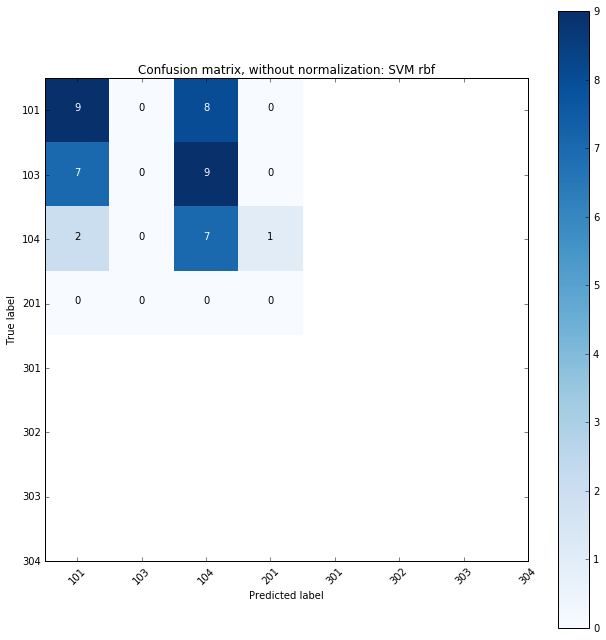

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


122.0
Selected number of features: 88
Train set size after feature selection:  (3116, 88)
Test set size after feature selection:  (253, 88)
Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.33333   0.56140   0.41830        57
      104.0    0.00000   0.00000   0.00000         6
      201.0    0.00000   0.00000   0.00000         3
      301.0    0.59770   0.40625   0.48372       128
      302.0    1.00000   0.18182   0.30769        11
      303.0    0.27778   0.11628   0.16393        43
      304.0    0.00000   0.00000   0.00000         5

avg / total    0.46818   0.35968   0.38021       253


Confusion matrix


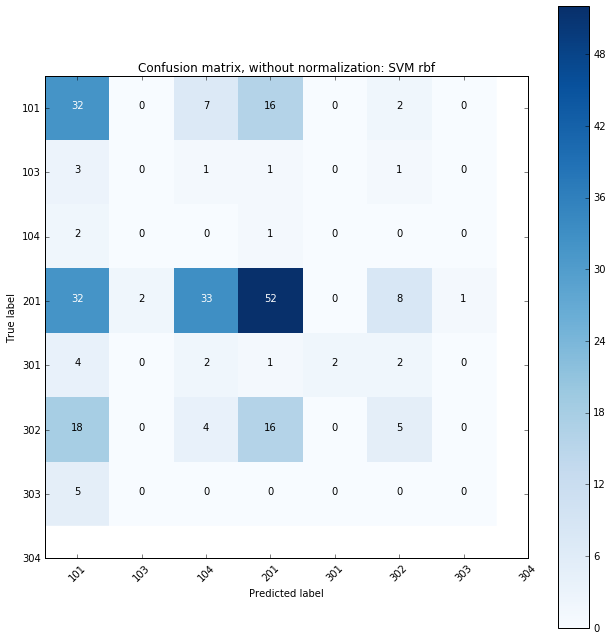

115.0
Selected number of features: 88
Train set size after feature selection:  (3218, 88)
Test set size after feature selection:  (151, 88)


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.68750   0.78571   0.73333        42
      103.0    0.00000   0.00000   0.00000         7
      104.0    0.00000   0.00000   0.00000         7
      201.0    0.50000   0.05556   0.10000        18
      301.0    0.41538   0.62791   0.50000        43
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.45000   0.60000   0.51429        15
      304.0    0.00000   0.00000   0.00000        10

avg / total    0.41382   0.46358   0.40937       151


Confusion matrix


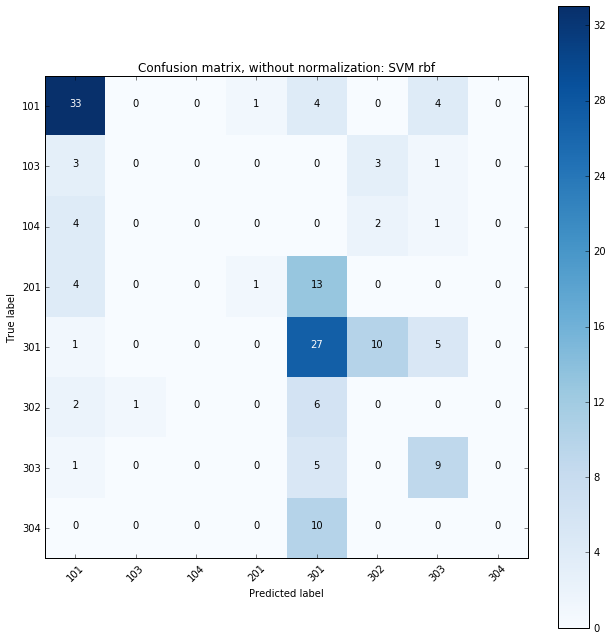

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


104.0
Selected number of features: 88
Train set size after feature selection:  (3264, 88)
Test set size after feature selection:  (105, 88)
Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.66102   0.95122   0.78000        41
      103.0    1.00000   0.28571   0.44444         7
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.06667   0.20000   0.10000         5
      301.0    0.75000   0.41379   0.53333        29
      302.0    1.00000   0.91667   0.95652        12
      303.0    1.00000   0.12500   0.22222         8

avg / total    0.72557   0.62857   0.61251       105


Confusion matrix


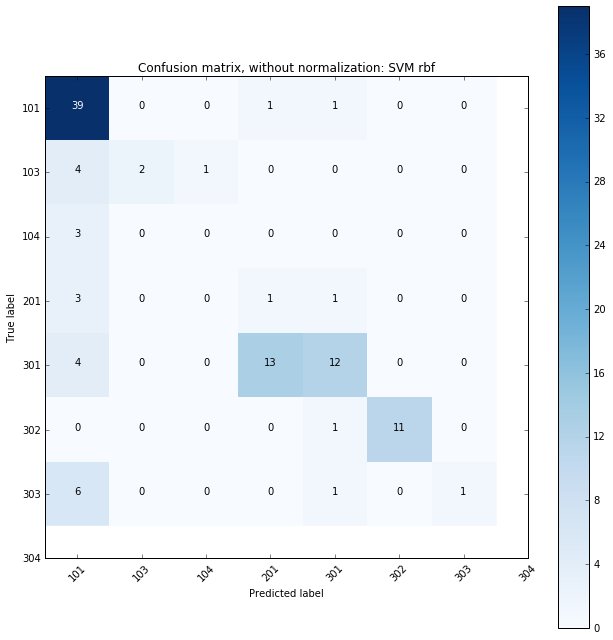

111.0
Selected number of features: 88
Train set size after feature selection:  (3258, 88)
Test set size after feature selection:  (111, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.40000   0.72222   0.51485        36
      103.0    0.00000   0.00000   0.00000         2
      104.0    0.00000   0.00000   0.00000        17
      201.0    0.00000   0.00000   0.00000        21
      301.0    0.10000   0.33333   0.15385        12
      302.0    0.00000   0.00000   0.00000        10
      303.0    0.00000   0.00000   0.00000         2
      304.0    0.00000   0.00000   0.00000        11

avg / total    0.14054   0.27027   0.18361       111


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


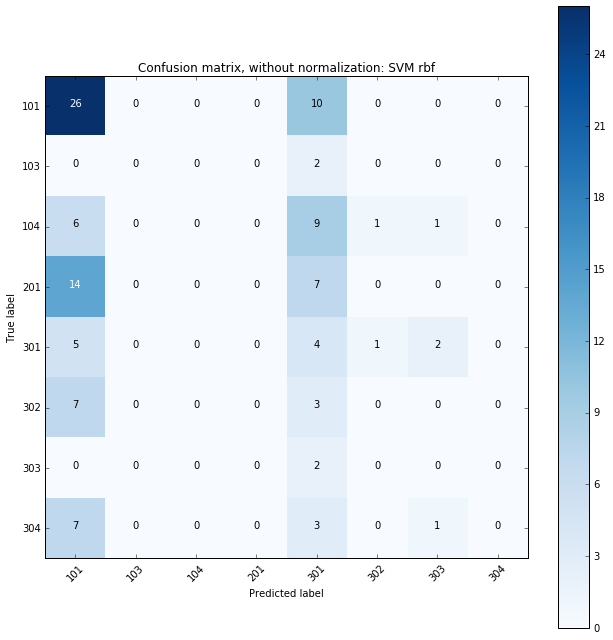

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


107.0
Selected number of features: 88
Train set size after feature selection:  (3225, 88)
Test set size after feature selection:  (144, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.69231   0.85714   0.76596        21
      104.0    0.00000   0.00000   0.00000        11
      201.0    0.00000   0.00000   0.00000        31
      301.0    0.42991   0.97872   0.59740        47
      302.0    1.00000   0.57143   0.72727         7
      303.0    0.83333   0.50000   0.62500        10
      304.0    0.00000   0.00000   0.00000        17

avg / total    0.34776   0.50694   0.38544       144


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


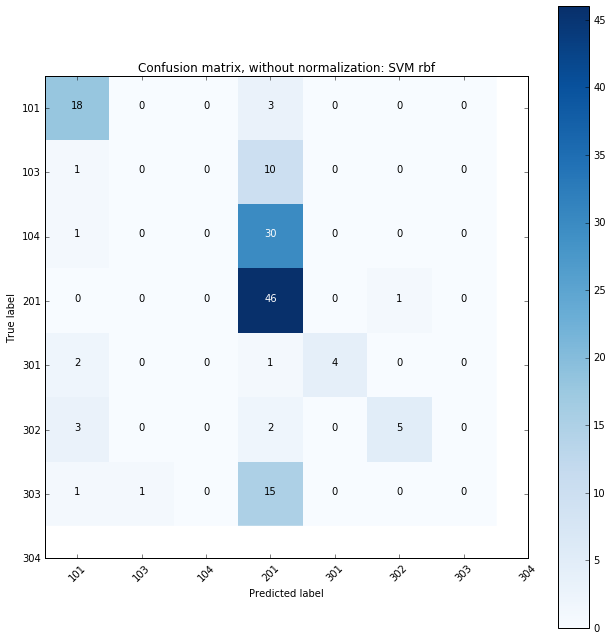

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


112.0
Selected number of features: 88
Train set size after feature selection:  (3236, 88)
Test set size after feature selection:  (133, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.55882   0.70370   0.62295        27
      103.0    1.00000   0.11111   0.20000         9
      104.0    0.00000   0.00000   0.00000        11
      201.0    0.00000   0.00000   0.00000        13
      301.0    0.46316   0.93617   0.61972        47
      302.0    1.00000   0.50000   0.66667         4
      303.0    0.00000   0.00000   0.00000         7
      304.0    0.00000   0.00000   0.00000        15

avg / total    0.37486   0.49624   0.37905       133


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


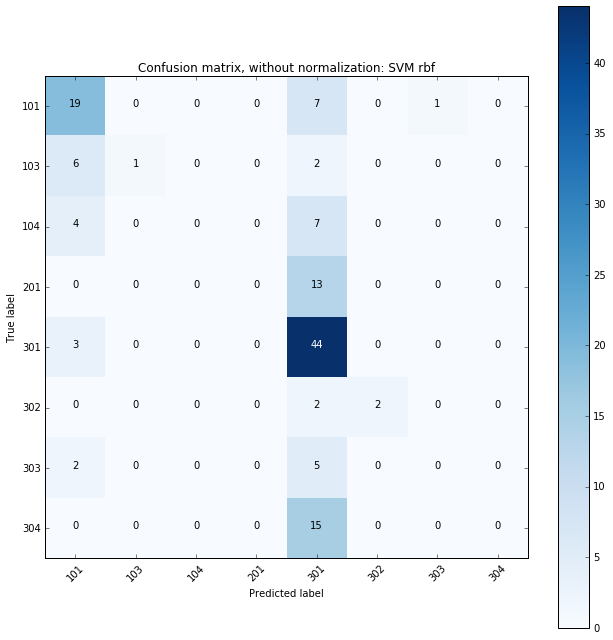

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


102.0
Selected number of features: 88
Train set size after feature selection:  (3143, 88)
Test set size after feature selection:  (226, 88)
Classification report for classifier SVC(C=10000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.70408   0.57025   0.63014       121
      103.0    0.00000   0.00000   0.00000         8
      104.0    0.00000   0.00000   0.00000         3
      201.0    0.00000   0.00000   0.00000        32
      301.0    0.12613   0.87500   0.22047        16
      302.0    1.00000   0.82353   0.90323        17
      303.0    1.00000   0.07692   0.14286        13
      304.0    0.00000   0.00000   0.00000        16

avg / total    0.51864   0.43363   0.42914       226


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


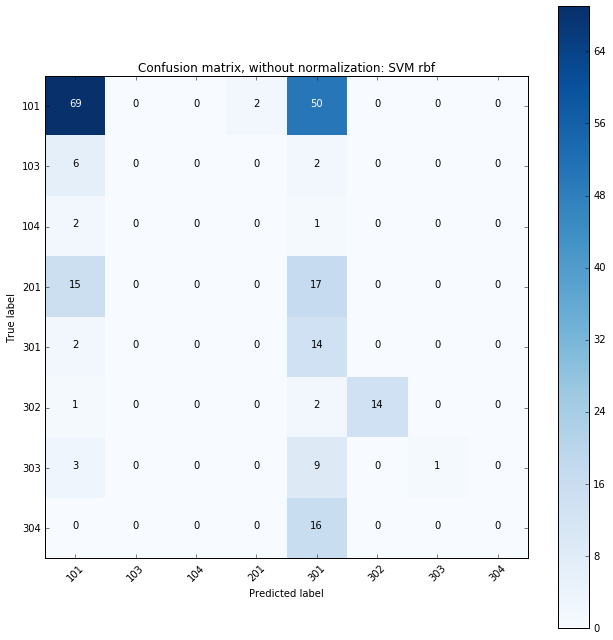

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


118.0
Selected number of features: 88
Train set size after feature selection:  (3242, 88)
Test set size after feature selection:  (127, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.81481   0.93617   0.87129        47
      103.0    0.00000   0.00000   0.00000        10
      104.0    0.00000   0.00000   0.00000        11
      201.0    1.00000   0.12500   0.22222         8
      301.0    0.36508   0.92000   0.52273        25
      302.0    1.00000   0.83333   0.90909         6
      303.0    1.00000   0.33333   0.50000        12
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.57814   0.60630   0.52954       127


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


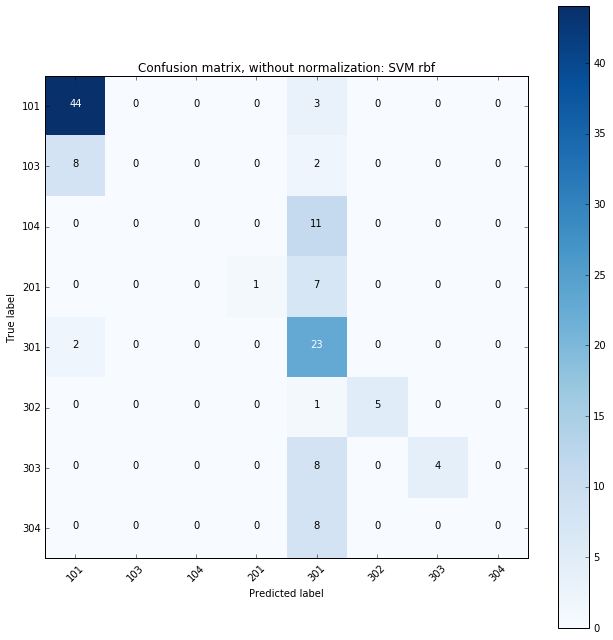

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


110.0
Selected number of features: 88
Train set size after feature selection:  (3277, 88)
Test set size after feature selection:  (92, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.53191   0.54348   0.53763        46
      103.0    0.00000   0.00000   0.00000         4
      104.0    0.00000   0.00000   0.00000         7
      201.0    0.33333   0.07143   0.11765        14
      301.0    0.16667   0.70000   0.26923        10
      302.0    0.00000   0.00000   0.00000         3
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.33480   0.35870   0.31598        92


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


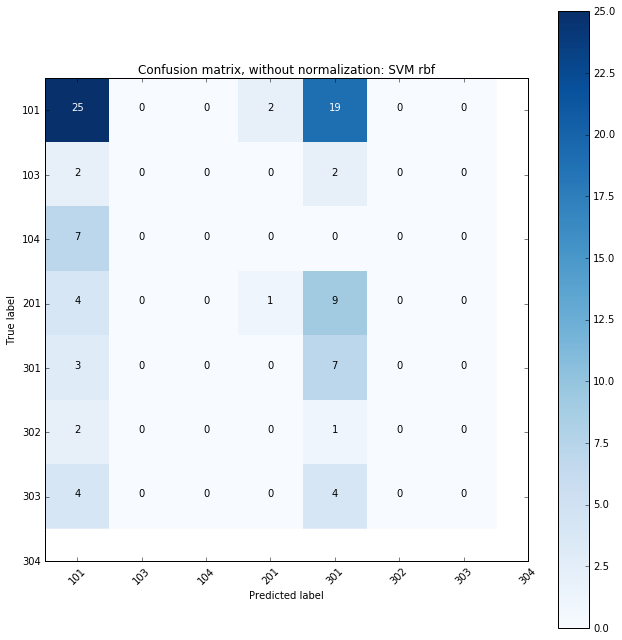

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


103.0
Selected number of features: 88
Train set size after feature selection:  (3176, 88)
Test set size after feature selection:  (193, 88)
Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.27551   0.65854   0.38849        41
      103.0    0.00000   0.00000   0.00000         6
      104.0    0.14286   0.11111   0.12500         9
      201.0    0.25926   0.17073   0.20588        41
      301.0    0.47368   0.39130   0.42857        46
      302.0    0.00000   0.00000   0.00000         9
      303.0    0.33333   0.08000   0.12903        25
      304.0    0.00000   0.00000   0.00000        16

avg / total    0.27634   0.28497   0.25096       193


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


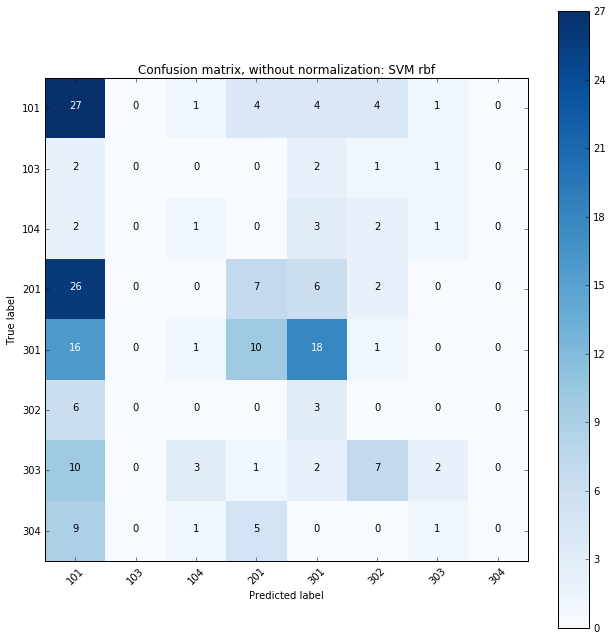

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


105.0
Selected number of features: 88
Train set size after feature selection:  (3184, 88)
Test set size after feature selection:  (185, 88)
Classification report for classifier SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.53947   0.58571   0.56164        70
      103.0    0.00000   0.00000   0.00000         1
      104.0    0.00000   0.00000   0.00000        15
      201.0    0.00000   0.00000   0.00000        41
      301.0    0.10000   0.43750   0.16279        16
      302.0    0.94118   0.69565   0.80000        23
      303.0    0.11765   0.12500   0.12121        16
      304.0    0.00000   0.00000   0.00000         3

avg / total    0.33996   0.35676   0.33654       185


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


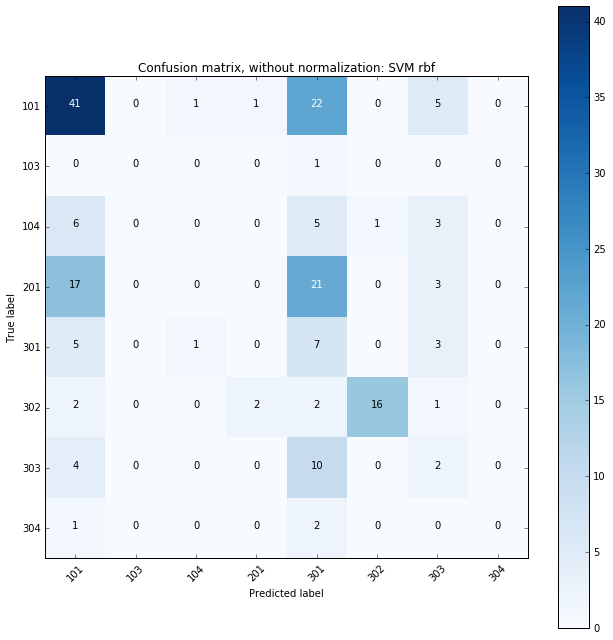

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


109.0
Selected number of features: 88
Train set size after feature selection:  (3226, 88)
Test set size after feature selection:  (143, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.76119   0.77273   0.76692        66
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000         4
      201.0    0.50000   0.03704   0.06897        27
      301.0    0.25397   0.80000   0.38554        20
      302.0    1.00000   0.33333   0.50000         6
      303.0    0.33333   0.23077   0.27273        13
      304.0    0.00000   0.00000   0.00000         4

avg / total    0.55351   0.51049   0.46668       143


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


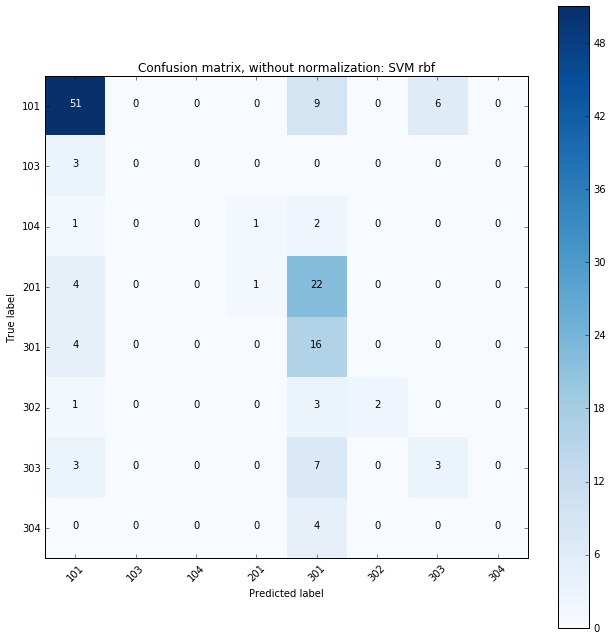

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


117.0
Selected number of features: 88
Train set size after feature selection:  (3305, 88)
Test set size after feature selection:  (64, 88)
Classification report for classifier SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.64000   0.94118   0.76190        17
      104.0    0.00000   0.00000   0.00000         9
      201.0    0.00000   0.00000   0.00000         9
      301.0    0.24324   0.90000   0.38298        10
      303.0    1.00000   0.06667   0.12500        15
      304.0    0.00000   0.00000   0.00000         4

avg / total    0.44238   0.40625   0.29152        64


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


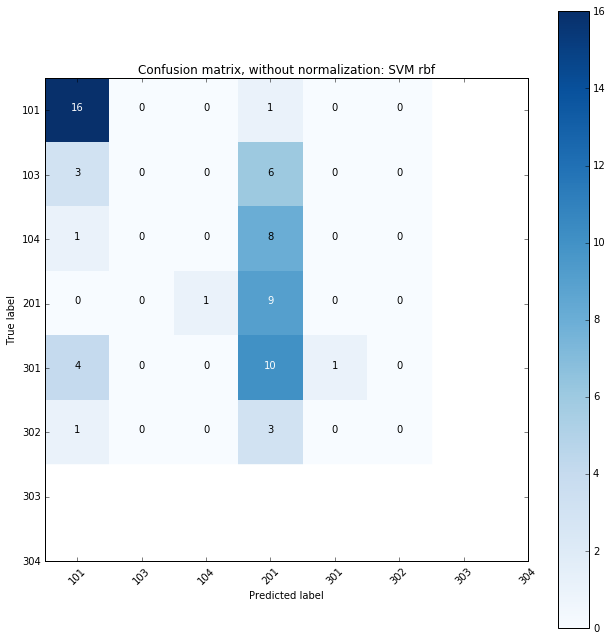

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


108.0
Selected number of features: 88
Train set size after feature selection:  (3173, 88)
Test set size after feature selection:  (196, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.37634   0.52239   0.43750        67
      103.0    0.00000   0.00000   0.00000        12
      104.0    0.00000   0.00000   0.00000         5
      201.0    0.00000   0.00000   0.00000        21
      301.0    0.36709   0.45312   0.40559        64
      302.0    0.50000   0.25000   0.33333         8
      303.0    0.00000   0.00000   0.00000        11
      304.0    0.00000   0.00000   0.00000         8

avg / total    0.26892   0.33673   0.29560       196


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


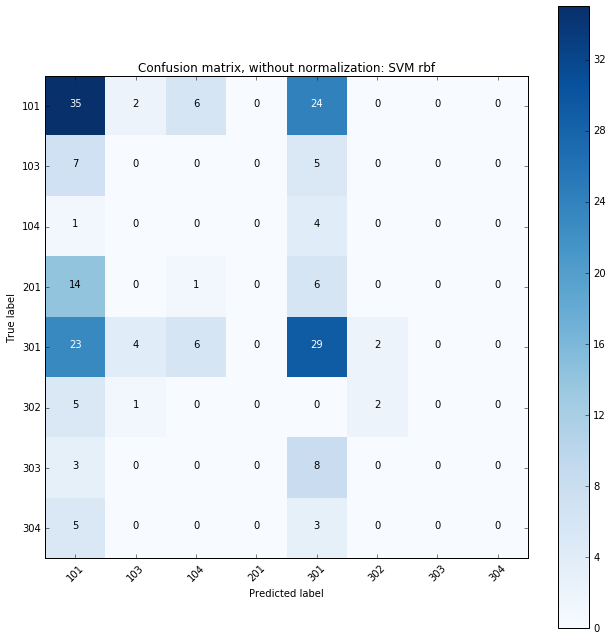

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


113.0
Selected number of features: 88
Train set size after feature selection:  (3232, 88)
Test set size after feature selection:  (137, 88)
Classification report for classifier SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

      101.0    0.58140   0.86207   0.69444        29
      103.0    0.00000   0.00000   0.00000         3
      104.0    0.00000   0.00000   0.00000        12
      201.0    1.00000   0.07143   0.13333        14
      301.0    0.59341   0.94737   0.72973        57
      303.0    1.00000   0.06250   0.11765        16
      304.0    0.00000   0.00000   0.00000         6

avg / total    0.58894   0.59124   0.47797       137


Confusion matrix


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


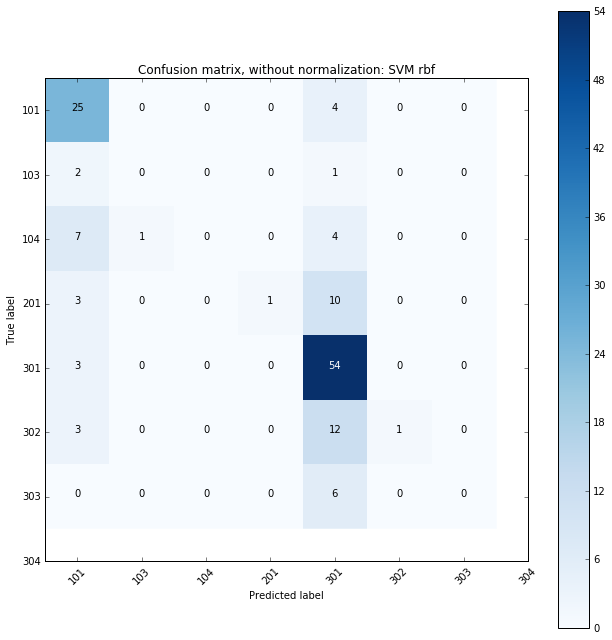

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


120.0
Selected number of features: 88
Train set size after feature selection:  (3311, 88)
Test set size after feature selection:  (58, 88)


In [ ]:
# a = []
print('Number of subjects: ', len(groups))

results = {}

for g in groups: 
    print(g)
    test = df.loc[(df.subject == g)]
    train = df.loc[(df.subject != g)]
    
    features = select_features(train[features], train['activity'])    
    
    X_train = train[features]
    y_train = train['activity']
    print("Train set size after feature selection: ", X_train.shape)
    
    X_test = test[features]
    y_test = test['activity']
    print("Test set size after feature selection: ", X_test.shape)    
    
    models = grid(X_train,y_train)
    
    #fitting models to test_data
    for model in models:
        res = test_classifier (model, X_train, y_train, X_test, y_test)
        if model[2] not in results:
            results[model[2]] = [[],[]]
        results[model[2]][0].append(res[0])
        results[model[2]][1].append(res[1])
    
#     a.append(run(pram,X_train,y_train,X_test,y_test))
# avg = np.array(a)
# print(np.mean(avg))    

In [ ]:
results_average = {}
for key, value in results.items():
    results_average[key] = []
    results_average[key].append(np.mean(value[0]))
    
    conf_mat_sum = [[0 for col in range(len(value[1][0][0]))] for row in range(len(value[1][0]))]
    for x in value[1]:
        conf_mat_sum = np.add(conf_mat_sum,x)
    
    results_average[key].append(conf_mat_sum)
    
    print(key,':')
    print("Average Weighted F1-score: ", results_average[key][0])
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat_sum, classes=class_names, title='Confusion matrix, without normalization')

    plt.show()
    
    
print(results_average)

In [ ]:
results_average = {}
for key, value in results.items():
    #print("key",key)
    #print("val",value)
    results_average[key] = []
    results_average[key].append(np.mean(value[0]))
    
    conf_mat_sum = np.array([[0 for col in range(8)] for row in range(8)])
    for x in value[1]:
        #print(len(x))
        #print(len(conf_mat_sum))
        #print(conf_mat_sum)
        #print(x)
        if len(conf_mat_sum) > len(x):
            c = conf_mat_sum.copy()
            c[:x.shape[0],:x.shape[1]] +=  x
        conf_mat_sum = c
    
    results_average[key].append(conf_mat_sum)
    
    print(key,':')
    print("Average Weighted F1-score: ", results_average[key][0])
    
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(conf_mat_sum, classes=class_names, title='Confusion matrix, without normalization')

    plt.show()
    
    
print(results_average)